In this project we will analize a small dataset of prison escapes where a helicopter was used in an attempt to free prisioner.
I am following the model in this site: https://medium.com/@iamandre/prison-break-analysing-helicopter-prison-escape-data-87c111d33bf6

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
def data_from_url(url, tag_name, class_name):
    response = requests.get(url)
    if response.status_code != 200:        
        print('HTTP 404: Page not found')    
    else:        
        soup = BeautifulSoup(response.text,'html.parser')        
        html_output = soup.find(tag_name,{'class':class_name})        
        output = pd.read_html(str(html_output))    
    return output[0]

In [3]:
escape_data = data_from_url("https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes", "table", "wikitable")
escape_data.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a h..."
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed off shotgun against...


In [4]:
escape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         48 non-null     object
 1   Prison name  48 non-null     object
 2   Country      48 non-null     object
 3   Succeeded    48 non-null     object
 4   Escapee(s)   48 non-null     object
 5   Details      48 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [5]:
escape_data['Date'] = pd.to_datetime(escape_data['Date'])
escape_data.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,1971-08-19,Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,1973-10-31,Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a h..."
2,1978-05-24,"United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed off shotgun against...


In [6]:
escape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         48 non-null     datetime64[ns]
 1   Prison name  48 non-null     object        
 2   Country      48 non-null     object        
 3   Succeeded    48 non-null     object        
 4   Escapee(s)   48 non-null     object        
 5   Details      48 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 2.4+ KB


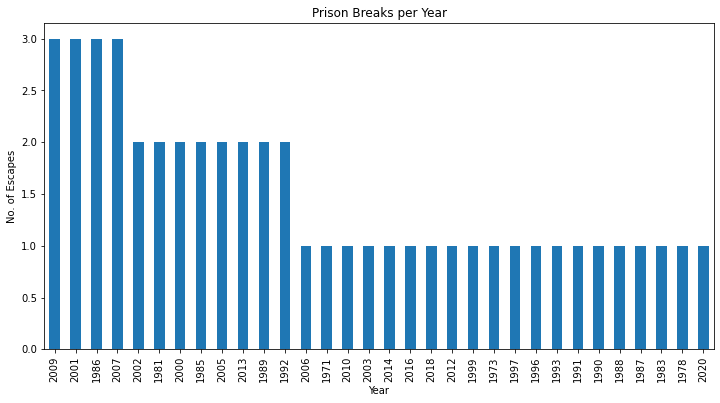

In [8]:
escape_year_plot = escape_data['Date'].dt.year.value_counts().plot(kind='bar', 
                                                xlabel='Year', 
                                                ylabel='No. of Escapes',
                                                title='Prison Breaks per Year', 
                                                figsize=(12,6))

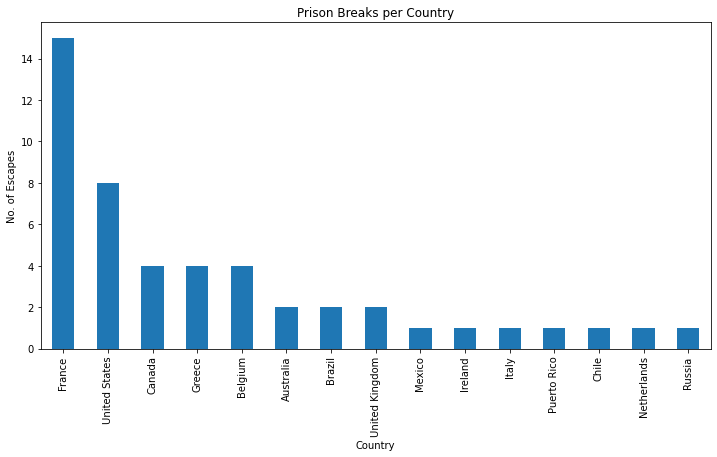

In [9]:
escape_country_plot = escape_data['Country'].value_counts().plot(kind='bar', 
                                                                 xlabel = 'Country', 
                                                                 ylabel = 'No. of Escapes', 
                                                                 title = 'Prison Breaks per Country', 
                                                                 figsize = (12,6))